# KNeighborsClassifier

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
dataBase = pd.read_csv('./dados/Celular.csv')
dataBase.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Crianção da features

In [3]:
features = np.array(dataBase[['salario', 'economias', 'idade', 'dividas']]) # vetorizar todas as colunas menos a última
label = np.array(dataBase['plano']) # vetorizar a última coluna label

### Separando base Traino é teste

In [4]:
features_train, features_test, label_train, label_test = split(features, label, test_size=0.3)

In [8]:
len(features_test)

45

### Criando o Modelo

In [46]:
Kclass = KNeighborsClassifier(5)  # Considero 5 vizinho pois tenho 3 grupos

**Correto. É na função KNeighborsClassifier() que adicionamos as opções de classificação, e foram escolhidos cinco vizinhos mais próximos para a decisão da classe. Este é um número bom porque não é igual e nem múltiplo do número de classes.**

In [47]:
Kclass.fit(features_train, label_train)

KNeighborsClassifier()

### Fazendo a predição

In [53]:
predict = Kclass.predict(features_test)

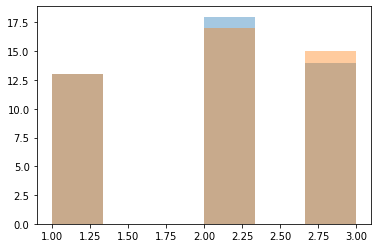

In [54]:
sns.distplot(label_test, bins=6, kde=False)
sns.distplot(predict, bins=6, kde=False)

### Testando a accuracy

In [55]:
print(f'Taxa de acerto do modelo: {round(accuracy(label_test, predict) * 100,2)}%')

Taxa de acerto do modelo: 97.78%


### Testando os dados a qual o modelo usou para treinar

In [56]:
predict_v2 = Kclass.predict(features_train)

In [57]:
print(f'Taxa de acerto do modelo: {round(accuracy(label_train, predict_v2) * 100,2)}%')

Taxa de acerto do modelo: 97.14%


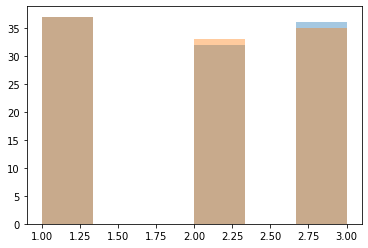

In [58]:
sns.distplot(label_train, bins=6, kde=False)
sns.distplot(predict_v2, bins=6, kde=False)

### New Test

#### separando a base em 10 partes diferentes e testando cada parter

#### Sobreajuste e divisão em treino e teste

In [61]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [63]:
params = {'n_neighbors': [5]}

In [65]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=skfold, verbose=1,scoring='accuracy', return_train_score=True)

In [66]:
gs.fit(features, label)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [78]:
result = float(gs.cv_results_['mean_test_score'])
print(f'Taxa de acerto do modelo: {result * 100}%')

Taxa de acerto do modelo: 96.4%
